In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
import pickle
import yaml
import dcargs
import pandas as pd
from experiment import ExperimentParameters
import glob
from tqdm import tqdm
from yaml.loader import SafeLoader

# # path = "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/2022-08-05-17-08-11_basic_experiment"
# path = "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/2022-10-26-13-39-34_test_grid_search_naive"

# sys.path.append(path)

# # from importlib import reload
# # import myPyFuncs as mf
# # reload(mf)

# fileName = path+"/data.pickle5"
# configName = path+"/config.yaml"

# with open(fileName, "rb") as f:
#     resFile = pickle.load(f)

# with open(configName, 'r') as f:
#     data = dcargs.from_yaml(ExperimentParameters, f)
#     print(data)

In [2]:
# print(dir(o))
# print(o.keys)
# print(o.keys())
colData = resFile['collective_data']
# print(colData.keys())
adjc = colData['connectivity']
# print(colData['connectivity'])
agntData = colData['agent_data']
# print(agntData[0].keys())
# print(agntData[0].belief_std)

n_agents = 10
steps = 10

zArr = np.zeros((n_agents,steps))
pArr = zArr.copy()

for t in colData['time']:
  print('t: ' + str(t))
  z = agntData[t].belief_mean
  std = agntData[t].belief_std
  zArr[:,int(t)] = z
  pArr[:,int(t)] = std
  # print(mArr[0])
# print(colData['agent_data'])
# print(len(adjc))

t: 0.0
t: 1.0
t: 2.0
t: 3.0
t: 4.0
t: 5.0
t: 6.0
t: 7.0
t: 8.0
t: 9.0


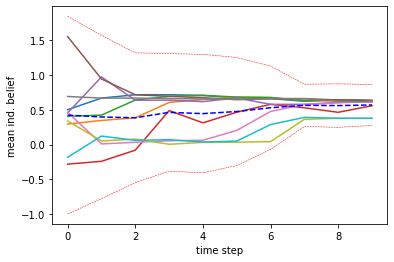

In [3]:
plt.plot(zArr)
avgZArr = np.mean(zArr, axis=1)
upBnd = avgZArr + 3*np.std(zArr, axis=1)
loBnd = avgZArr - 3*np.std(zArr, axis=1)
plt.plot(avgZArr,"--b")
plt.plot(upBnd,"--r", loBnd, "--r",lw=0.5)
plt.xlabel("time step")
plt.ylabel("mean ind. belief")
plt.show()

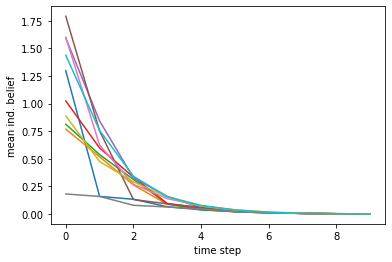

In [4]:
plt.plot(pArr)
# plt.plot(np.mean(pArr, axis=1),"--b")
plt.xlabel("time step")
plt.ylabel("mean ind. belief")
plt.show()

0.0627975190766099

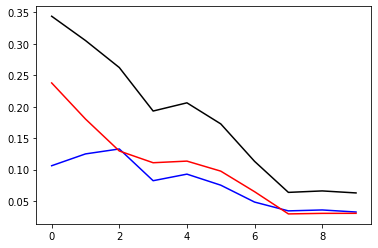

In [5]:
avgZArr = np.mean(zArr, axis=1)
z_gt = 0.75
E_t = (avgZArr-z_gt)**2
E_p2 = (zArr - avgZArr)**2
E_p = np.mean(E_p2, axis=1)
E_a = E_t + E_p
plt.plot(E_t,'-b')
plt.plot(E_p,'-r')
plt.plot(E_a, '-k')

E_a[-1]

In [22]:
# print(data)
expConfig_data = data
print(type(expConfig_data))
print(expConfig_data.network_params.mean_agent_measurement_noise)

<class 'experiment.ExperimentParameters'>
0.2


In [3]:
def parse_experiment_data(file_path):
  n_agents = 10
  steps = 10
  z_gt = 0.75

  colData = resFile['collective_data']
  adjc = colData['connectivity']
  agntData = colData['agent_data']

  zArr = np.zeros((n_agents,steps))
  pArr = zArr.copy()

  for t in colData['time']:
    z = agntData[t].belief_mean
    std = agntData[t].belief_std
    zArr[:,int(t)] = z
    pArr[:,int(t)] = std

  avgZArr = np.mean(zArr, axis=1)
  E_t = (avgZArr-z_gt)**2
  E_p2 = (zArr - avgZArr)**2
  E_p = np.mean(E_p2, axis=1)
  E_a = E_t + E_p

  d = {"Trueness Error": E_t, "Precision Error": E_p, "Accuracy Error": E_a, "Collective Mean": avgZArr, "Number of Agents": [n_agents for _ in range(steps)], "True Value": [z_gt for _ in range(steps)], "Timestep": [i for i in range(steps)]}
  for i in range(n_agents):
    d["Belief Mean Agent "+str(i)] = zArr[i]
    d["Belief Std Agent "+str(i)] = pArr[i]
  return pd.DataFrame.from_dict(d)

df = parse_experiment_data(fileName)
# print(df)
# print(df["Trueness Error"].to_numpy()[-1])
# print(df.mean().plot(kind="barh"))

def parse_experiments(base_file_path):
  pathes = glob.glob(os.path.join(base_file_path, "*"))
  dataframes = [parse_experiment_data(p) for p in pathes]
  return pd.concat(dataframes, ignore_index=True)

df = parse_experiments("/home/mohsen/Project/colab/collective-decison-making-with-direl/results/2022-10-26-13-39-34_test_grid_search_naive")
# df = parse_experiments("/home/mohsen/Project/colab/collective-decison-making-with-direl/results/2022-08-22-17-22-03_test_grid_search")

print(df.groupby("Timestep").mean().plot(kind="barh"))


NameError: name 'resFile' is not defined

In [25]:
configData = expConfig_data

In [4]:
def parse_experiment_data(file_path):
#     print("File Path is: " + file_path)

    pickleFileName = file_path+"/data.pickle5"
    yamlFileName = file_path+"/config.yaml"

    with open(pickleFileName, "rb") as f:
        resFile = pickle.load(f)

    with open(yamlFileName, 'r') as f:
        configData = dcargs.from_yaml(ExperimentParameters, f)
        
    
    n_agents = configData.network_params.n_agents
    steps = configData.steps
    z_gt = configData.true_value
    
    # not checked yet
    mean_agent_measurement_noise = configData.network_params.mean_agent_measurement_noise
    scalar_param1 = configData.network_params.scalar_param1
    std_agent_measurement_noise = configData.network_params.std_agent_measurement_noise
    
    colData = resFile['collective_data']
    adjc = colData['connectivity']
    agntData = colData['agent_data']

    zArr = np.zeros((n_agents,steps))
    pArr = zArr.copy()

    for t in colData['time']:
        z = agntData[t].belief_mean
        std = agntData[t].belief_std
        zArr[:,int(t)] = z
        pArr[:,int(t)] = std

    avgZArr = np.mean(zArr, axis=1)
    E_t = (avgZArr-z_gt)**2
    E_p2 = (zArr - avgZArr)**2
    E_p = np.mean(E_p2, axis=1)
    E_a = E_t + E_p

    d = {"Trueness Error": E_t, "Precision Error": E_p, "Accuracy Error": E_a, "Collective Mean": avgZArr, 
         "Number of Agents": [n_agents for _ in range(steps)], "True Value": [z_gt for _ in range(steps)], 
         "Timestep": [i for i in range(steps)],
         "mean agent measurement noise": [mean_agent_measurement_noise for _ in range(steps)],
         "std agent measurement noise": [std_agent_measurement_noise for _ in range(steps)],
         "scalar param1": [scalar_param1 for _ in range(steps)]}
    
    for i in range(n_agents):
        d["Belief Mean Agent "+str(i)] = zArr[i]
        d["Belief Std Agent "+str(i)] = pArr[i]
        
    return pd.DataFrame.from_dict(d)

# df = parse_experiment_data(fileName)


def parse_experiments(base_file_path):
  pathes = glob.glob(os.path.join(base_file_path, "*"))
  dataframes = [parse_experiment_data(p) for p in pathes]
  return pd.concat(dataframes, ignore_index=True)

df = parse_experiments("/home/mohsen/Project/colab/collective-decison-making-with-direl/results/2022-10-26-13-39-34_test_grid_search_naive")
# df = parse_experiments("/home/mohsen/Project/colab/collective-decison-making-with-direl/results/2022-08-22-17-22-03_test_grid_search")

# print(df.groupby("Timestep").mean().plot(kind="barh"))
print(df.groupby("scalar param1").mean().plot(kind="barh"))


ValueError: could not broadcast input array from shape (10,) into shape (100,)

In [31]:
# print(df.groupby("scalar param1").mean().plot(kind="barh"))
# print(df.groupby("Timestep").mean().plot(kind="barh"))
# print(df.groupby("scalar param1").mean().plot(kind="barh"))
df.groupby("scalar param1").mean()

,Trueness Error,Precision Error,Accuracy Error,Collective Mean,Number of Agents,True Value,Timestep,mean agent measurement noise,std agent measurement noise,Belief Mean Agent 0,...,Belief Mean Agent 5,Belief Std Agent 5,Belief Mean Agent 6,Belief Std Agent 6,Belief Mean Agent 7,Belief Std Agent 7,Belief Mean Agent 8,Belief Std Agent 8,Belief Mean Agent 9,Belief Std Agent 9
scalar param1,,,,,,,,,,,,,,,,,,,,,
0.1,0.026397,0.196450,0.222847,0.771398,10.0,0.75,4.5,0.825,0.922,0.773855,...,0.771125,1.059187,0.771125,1.055783,0.771125,1.054080,0.771125,1.053229,0.771125,1.052804
0.3,0.045332,0.097282,0.142615,0.716608,10.0,0.75,4.5,0.825,0.922,0.742222,...,0.707989,0.030414,0.707340,0.015046,0.706950,0.007503,0.706359,0.003738,0.704276,0.001855
0.5,0.066558,0.048709,0.115267,0.699303,10.0,0.75,4.5,0.825,0.922,0.710467,...,0.691490,0.028548,0.694429,0.014181,0.693400,0.007073,0.690173,0.003535,0.690332,0.001771
0.7,0.041104,0.052714,0.093818,0.809073,10.0,0.75,4.5,0.825,0.922,0.760860,...,0.820652,0.024578,0.830910,0.011915,0.829944,0.005873,0.830008,0.002939,0.829822,0.001467
0.9,0.029451,0.041591,0.071043,0.743596,10.0,0.75,4.5,0.825,0.922,0.743006,...,0.742492,0.028646,0.743208,0.014358,0.739878,0.007154,0.740076,0.003575,0.738779,0.001789
1.0,0.065708,0.050143,0.115851,0.732651,10.0,0.75,4.5,0.825,0.922,0.745668,...,0.727188,0.029703,0.727677,0.014741,0.726670,0.007375,0.727733,0.003682,0.727817,0.001842


<AxesSubplot:xlabel='std agent measurement noise', ylabel='scalar param1'>

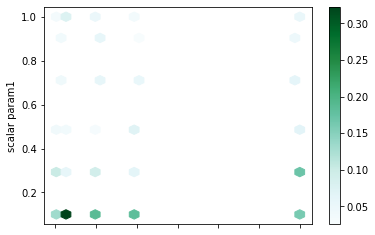

In [42]:
df.plot.hexbin(x="std agent measurement noise", y="scalar param1", C="Precision Error", reduce_C_function=np.mean, gridsize=25)

In [ ]:
df.plot.scatter(x="std agent measurement noise", y="scalar param1", c="Precision Error", logx=True)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

x = df.mean()["std agent measurement noise"]
y= df.mean()["scalar param1"]
c = df.mean()['Precision Error']

print(c.shape)
# # Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

<AxesSubplot:xlabel='std agent measurement noise', ylabel='scalar param1'>

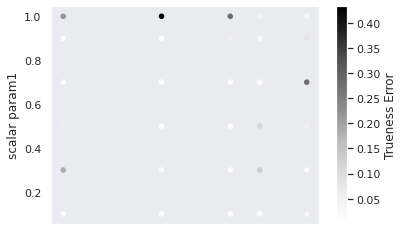

In [60]:
# print(df.groupby("Timestep").mean().plot(kind="barh"))
# print(df.groupby("scalar param1").mean().plot(kind="barh"))
mmu = 0.1
df_filtered = df[df['mean agent measurement noise']==mmu]
time_index = 9
df_filtered = df_filtered[df_filtered['Timestep']==time_index]

df_filtered.plot.scatter(x="std agent measurement noise", y="scalar param1", c="Trueness Error", logx=True)

# x = df_filtered[""]
# print(x)
# x.groupby("scalar param1").mean()

In [2]:
def parse_experiment_data(file_path):
#     print("File Path is: " + file_path)

    pickleFileName = file_path+"/data.pickle5"
    yamlFileName = file_path+"/config.yaml"

    with open(pickleFileName, "rb") as f:
        resFile = pickle.load(f)

    with open(yamlFileName, 'r') as f:
        configData = dcargs.from_yaml(ExperimentParameters, f)
        
    
    n_agents = configData.network_params.n_agents
    steps = configData.steps
    z_gt = configData.true_value
    
    # not checked yet
    mean_agent_measurement_noise = configData.network_params.mean_agent_measurement_noise
    scalar_param1 = configData.network_params.scalar_param1
    std_agent_measurement_noise = configData.network_params.std_agent_measurement_noise
    
    colData = resFile['collective_data']
    adjc = colData['connectivity']
    agntData = colData['agent_data']

    # print("nAgents: " + str(n_agents) + ", steps: " + str(steps));
    # print("agnt data: ", len(agntData))

    zArr = np.zeros((n_agents,steps))
    pArr = zArr.copy()

    for i in range(n_agents):
        z = agntData[i].belief_mean
        std = agntData[i].belief_std
        zArr[i,:] = z
        pArr[i,:] = std

    avgZArr = np.mean(zArr, axis=0)
    E_t = (avgZArr-z_gt)**2
    E_p2 = (zArr - avgZArr)**2
    E_p = np.mean(E_p2, axis=0)
    E_a = E_t + E_p

    d = {"Trueness Error": E_t, "Precision Error": E_p, "Accuracy Error": E_a, "Collective Mean": avgZArr, 
         "Number of Agents": [n_agents for _ in range(steps)], "True Value": [z_gt for _ in range(steps)], 
         "Timestep": [i for i in range(steps)],
         "mean agent measurement noise": [mean_agent_measurement_noise for _ in range(steps)],
         "std agent measurement noise": [std_agent_measurement_noise for _ in range(steps)],
         "scalar param1": [scalar_param1 for _ in range(steps)]}
    
    return pd.DataFrame.from_dict(d)


def parse_experiments(base_file_path):
  pathes = glob.glob(os.path.join(base_file_path, "*"))
  dataframes = []
  for p in tqdm(pathes):
    dataframes.append(parse_experiment_data(p))
#   dataframes = [parse_experiment_data(p) for p in tqdm(pathes)]
  return pd.concat(dataframes, ignore_index=True)

experiment_path = "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/2022-11-08-17-57-46_test_grid_search_Naive/"
df_file_path = experiment_path + "_df"
# experiment_path = "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/2022-09-02-15-37-36_test_grid_search";
df = parse_experiments(experiment_path)

df.to_pickle(df_file_path)

  0%|          | 425/659767 [00:21<9:23:25, 19.50it/s] 


KeyboardInterrupt: 

In [ ]:
df_file_path = "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/2022-10-28"

In [3]:

pickleFileName = df_file_path

with open(pickleFileName, "rb") as f:
    df = pickle.load(f)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


<AxesSubplot:xlabel='std agent measurement noise', ylabel='scalar param1'>

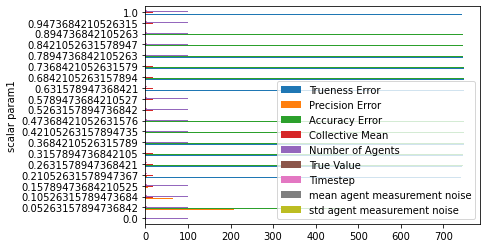

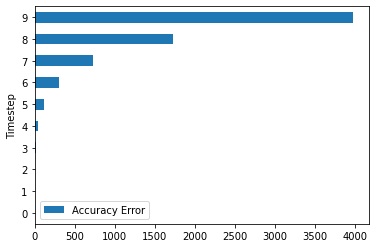

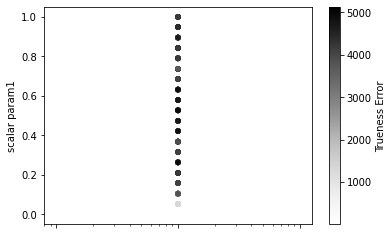

In [6]:
# print(df.groupby("Timestep").mean().plot(kind="barh"))
print(df.groupby("scalar param1").mean().plot(kind="barh"))

print(df[["Accuracy Error", "Timestep"]].groupby("Timestep").mean().plot(kind="barh"))

mmu = 0.1
df_filtered = df; #df[df['mean agent measurement noise']==mmu]
# df_filtered = df[df['mean agent measurement noise']==mmu]
time_index = 9
df_filtered = df_filtered[df_filtered['Timestep']==time_index]

df_filtered.plot.scatter(x="std agent measurement noise", y="scalar param1", c="Trueness Error", logx=True)

AxesSubplot(0.125,0.125;0.775x0.755)


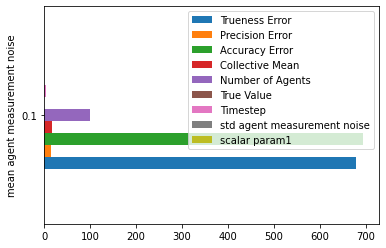

In [7]:
print(df.groupby("mean agent measurement noise").mean().plot(kind="barh"))

<AxesSubplot:xlabel='mean agent measurement noise', ylabel='scalar param1'>

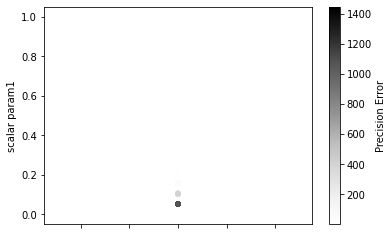

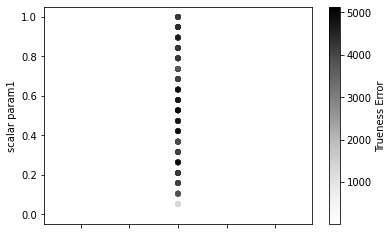

In [8]:
df_filtered.plot.scatter(x="mean agent measurement noise", y="scalar param1", c="Precision Error", logx=False)
df_filtered.plot.scatter(x="mean agent measurement noise", y="scalar param1", c="Trueness Error")

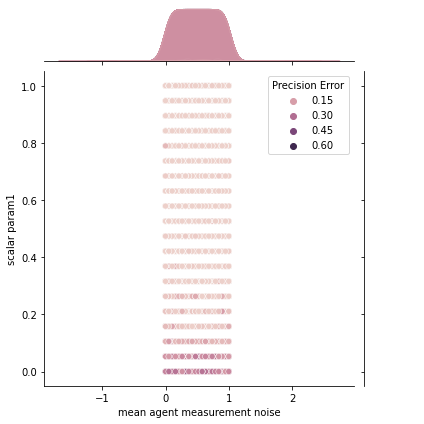

In [5]:
import seaborn as sns
# x="mean agent measurement noise", y="scalar param1", c="Precision Error"
sns.jointplot(x=df_filtered["mean agent measurement noise"], y=df_filtered["scalar param1"], hue=df_filtered["Precision Error"])

In [ ]:
    d = {"Trueness Error": E_t, "Precision Error": E_p, "Accuracy Error": E_a, "Collective Mean": avgZArr, 
         "Number of Agents": [n_agents for _ in range(steps)], "True Value": [z_gt for _ in range(steps)], 
         "Timestep": [i for i in range(steps)],
         "mean agent measurement noise": [mean_agent_measurement_noise for _ in range(steps)],
         "std agent measurement noise": [std_agent_measurement_noise for _ in range(steps)],
         "scalar param1": [scalar_param1 for _ in range(steps)]}

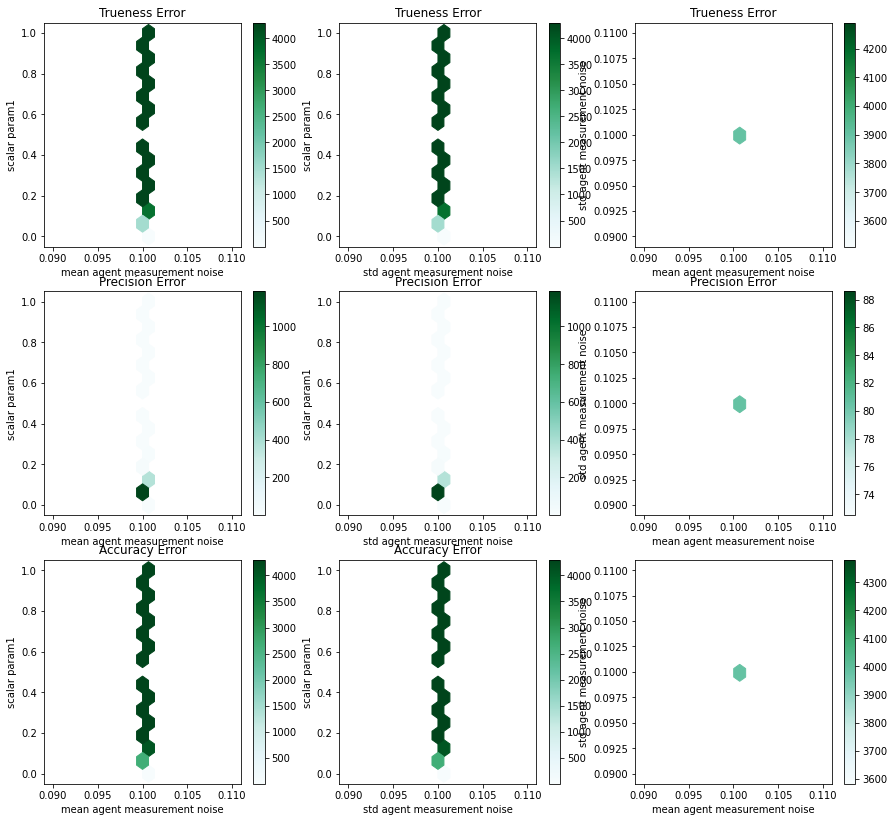

In [9]:
fig = plt.figure(1,figsize=(15,14))
fig.set_facecolor('w')
# plt.rcParams['figure.figsize'] = [10, 5]
ax1 = plt.subplot(3,3,1); ax1.set_title("Trueness Error")
df_filtered.plot.hexbin(x="mean agent measurement noise",   y="scalar param1",C="Trueness Error", reduce_C_function=np.mean, gridsize=15, ax=ax1);
ax2 = plt.subplot(3,3,2); ax2.set_title("Trueness Error")
df_filtered.plot.hexbin(x="std agent measurement noise",    y="scalar param1",C="Trueness Error", reduce_C_function=np.mean, gridsize=15, ax=ax2);
ax3 = plt.subplot(3,3,3); ax3.set_title("Trueness Error")
df_filtered.plot.hexbin(x="mean agent measurement noise",   y="std agent measurement noise", C="Trueness Error", reduce_C_function=np.mean, gridsize=15, ax=ax3);
# df_filtered.plot.hexbin(x="scalar param1",                  y="scalar param1",C="Trueness Error",  gridsize=15, ax=ax3);

ax4 = plt.subplot(3,3,4); ax4.set_title("Precision Error")
df_filtered.plot.hexbin(x="mean agent measurement noise",   y="scalar param1",C="Precision Error", reduce_C_function=np.mean, gridsize=15, ax=ax4);
ax5 = plt.subplot(3,3,5); ax5.set_title("Precision Error")
df_filtered.plot.hexbin(x="std agent measurement noise",    y="scalar param1",C="Precision Error", reduce_C_function=np.mean, gridsize=15, ax=ax5);
ax6 = plt.subplot(3,3,6); ax6.set_title("Precision Error")
df_filtered.plot.hexbin(x="mean agent measurement noise",   y="std agent measurement noise", C="Precision Error", reduce_C_function=np.mean, gridsize=15, ax=ax6);
# df_filtered.plot.hexbin(x="scalar param1",                  y="scalar param1",C="Precision Error", reduce_C_function=np.max, gridsize=15, ax=ax6);

ax7 = plt.subplot(3,3,7); ax7.set_title("Accuracy Error")
df_filtered.plot.hexbin(x="mean agent measurement noise",   y="scalar param1",C="Accuracy Error", reduce_C_function=np.mean, gridsize=15, ax=ax7);
ax8 = plt.subplot(3,3,8); ax8.set_title("Accuracy Error")
df_filtered.plot.hexbin(x="std agent measurement noise",    y="scalar param1",C="Accuracy Error", reduce_C_function=np.mean, gridsize=15, ax=ax8);
ax9 = plt.subplot(3,3,9); ax8.set_title("Accuracy Error")
df_filtered.plot.hexbin(x="mean agent measurement noise",   y="std agent measurement noise", C="Accuracy Error", reduce_C_function=np.mean, gridsize=15, ax=ax9);
# df_filtered.plot.hexbin(x="scalar param1",                  y="scalar param1",C="Accuracy Error", reduce_C_function=np.max, gridsize=15, ax=ax9);

# df_filtered.plot.hexbin(x="std agent measurement noise", y="scalar param1", C="Precision Error", reduce_C_function=np.max, gridsize=15, ax=ax3);

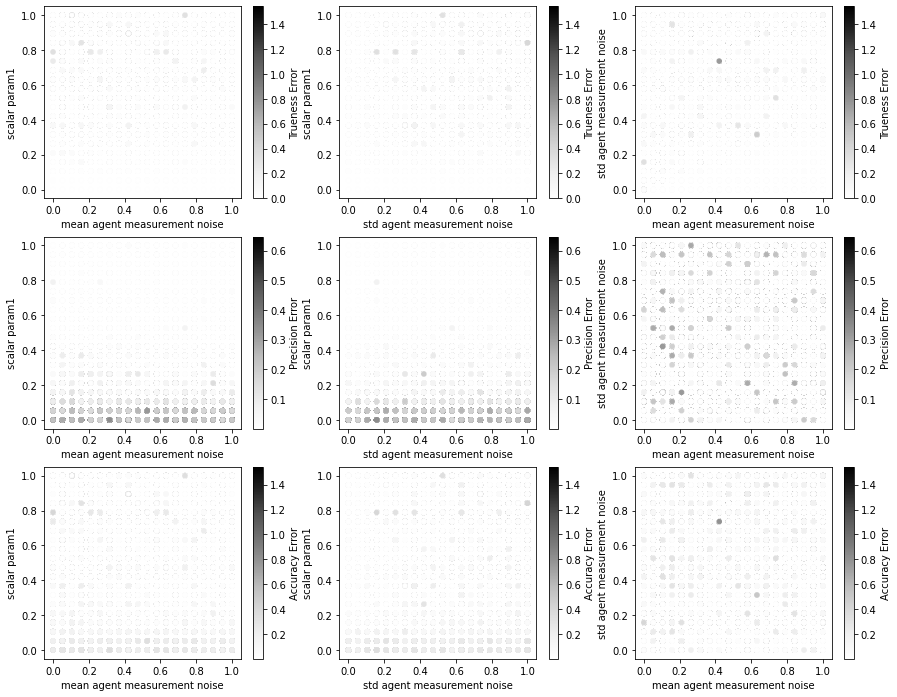

In [10]:

fig = plt.figure(1,figsize=(15,12))
# plt.rcParams['figure.figsize'] = [10, 5]
ax1 = plt.subplot(3,3,1)
df_filtered.plot.scatter(x="mean agent measurement noise",   y="scalar param1",c="Trueness Error",ax=ax1);
ax2 = plt.subplot(3,3,2)
df_filtered.plot.scatter(x="std agent measurement noise",    y="scalar param1",c="Trueness Error",  ax=ax2);
ax3 = plt.subplot(3,3,3)
df_filtered.plot.scatter(x="mean agent measurement noise",   y="std agent measurement noise", c="Trueness Error",   ax=ax3);
# df_filtered.plot.hexbin(x="scalar param1",                  y="scalar param1",C="Trueness Error",  ax=ax3);

ax4 = plt.subplot(3,3,4)
df_filtered.plot.scatter(x="mean agent measurement noise",   y="scalar param1",c="Precision Error",  ax=ax4);
ax5 = plt.subplot(3,3,5)
df_filtered.plot.scatter(x="std agent measurement noise",    y="scalar param1",c="Precision Error",  ax=ax5);
ax6 = plt.subplot(3,3,6)
df_filtered.plot.scatter(x="mean agent measurement noise",   y="std agent measurement noise", c="Precision Error",  ax=ax6);
# df_filtered.plot.hexbin(x="scalar param1",                  y="scalar param1",C="Precision Error",  ax=ax6);

ax7 = plt.subplot(3,3,7)
df_filtered.plot.scatter(x="mean agent measurement noise",   y="scalar param1",c="Accuracy Error",  ax=ax7);
ax8 = plt.subplot(3,3,8)
df_filtered.plot.scatter(x="std agent measurement noise",    y="scalar param1",c="Accuracy Error",  ax=ax8);
ax9 = plt.subplot(3,3,9)
df_filtered.plot.scatter(x="mean agent measurement noise",   y="std agent measurement noise", c="Accuracy Error",  ax=ax9);
# df_filtered.plot.hexbin(x="scalar param1",                  y="scalar param1",C="Accuracy Error",  ax=ax9);
